In [69]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
data = pd.read_csv("/content/heart_cleveland_upload.csv")

data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [71]:
print("(Rows, columns): " + str(data.shape))
data.columns

(Rows, columns): (297, 14)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [72]:
data.nunique(axis=0)# returns the number of unique values for each variable.

age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

In [73]:
#summarizes the count, mean, standard deviation, min, and max for numeric variables.
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [74]:
# Display the Missing Values

print(data.isna().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [75]:
data['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


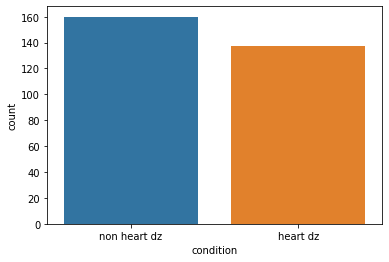

In [76]:
#people having diease vs not having 
sns.countplot(data['condition'])
plt.xticks([0,1],['non heart dz','heart dz'])
plt.show()

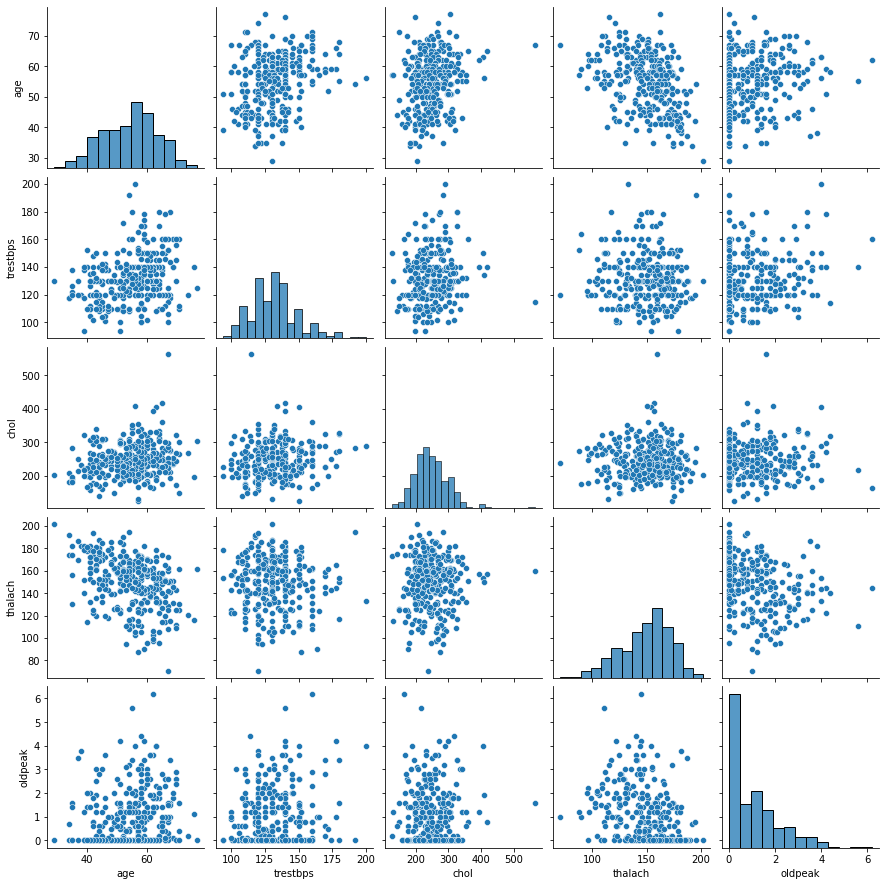

In [77]:
subData = data[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(subData)

Text(26.426458333333343, 0.5, 'ST depression')

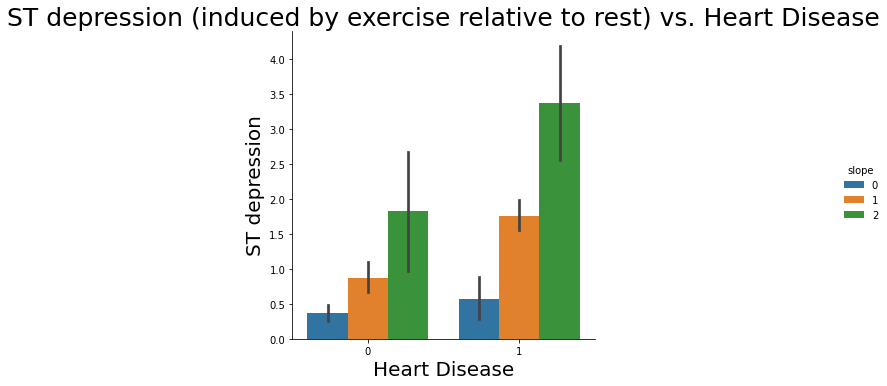

In [78]:
sns.catplot(x="condition", y="oldpeak", hue="slope", kind="bar", data=data);

plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)

Text(0, 0.5, 'Thalach Level')

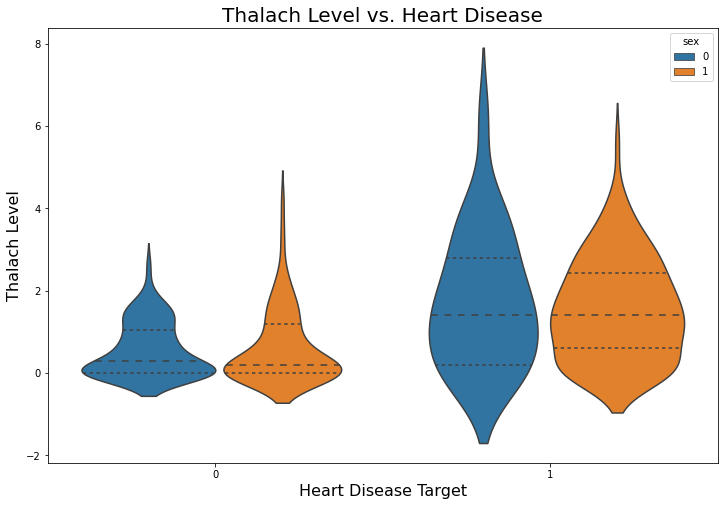

In [79]:
#The advantages of showing the Box & Violin plots is that it shows the basic statistics of the data, as well as its distribution. These plots are often used to compare the distribution of a given variable across some categories.
plt.figure(figsize=(12,8))
sns.violinplot(x= 'condition', y= 'oldpeak',hue="sex", inner='quartile',data= data )
plt.title("Thalach Level vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Thalach Level", fontsize=16)

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

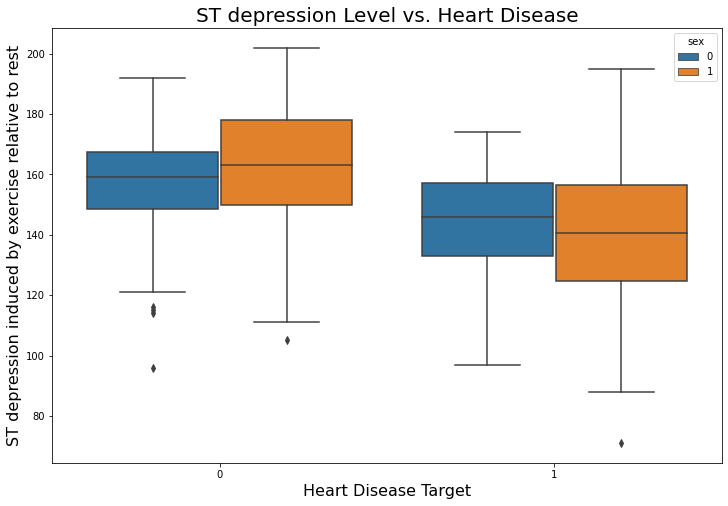

In [80]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'condition', y= 'thalach',hue="sex", data=data )
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)

In [19]:
# Filtering data by POSITIVE Heart Disease patient
pos_data = data[data['condition']==1]
pos_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.0
mean,56.759124,0.817518,2.583942,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,0.824818,1.145985,1.372263,1.0
std,7.899670,0.387658,0.828201,18.896730,49.679937,0.354387,0.976924,22.710673,0.500215,1.305006,0.567474,1.018506,0.882904,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,53.000000,1.000000,3.000000,120.000000,218.000000,0.000000,0.000000,125.000000,0.000000,0.600000,0.000000,0.000000,0.000000,1.0
50%,58.000000,1.000000,3.000000,130.000000,253.000000,0.000000,2.000000,142.000000,1.000000,1.400000,1.000000,1.000000,2.000000,1.0
75%,62.000000,1.000000,3.000000,145.000000,284.000000,0.000000,2.000000,157.000000,1.000000,2.500000,1.000000,2.000000,2.000000,1.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.0


In [83]:
# Filtering data by NEGATIVE Heart Disease patient
neg_data = data[data['condition']==0]
neg_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,160.000000,160.000000,160.000000,160.00000,160.00000,160.000000,160.00000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.0
mean,52.643750,0.556250,1.793750,129.17500,243.49375,0.143750,0.84375,158.581250,0.143750,0.59875,0.412500,0.275000,0.375000,0.0
std,9.551151,0.498386,0.925508,16.37399,53.75755,0.351938,0.98764,19.043304,0.351938,0.78716,0.597558,0.633945,0.758599,0.0
min,29.000000,0.000000,0.000000,94.00000,126.00000,0.000000,0.00000,96.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
25%,44.750000,0.000000,1.000000,120.00000,208.75000,0.000000,0.00000,149.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
50%,52.000000,1.000000,2.000000,130.00000,235.50000,0.000000,0.00000,161.000000,0.000000,0.20000,0.000000,0.000000,0.000000,0.0
75%,59.000000,1.000000,2.000000,140.00000,268.25000,0.000000,2.00000,172.000000,0.000000,1.10000,1.000000,0.000000,0.000000,0.0
max,76.000000,1.000000,3.000000,180.00000,564.00000,1.000000,2.00000,202.000000,1.000000,4.20000,2.000000,3.000000,2.000000,0.0


In [84]:
print("(Positive Patients ST depression): " + str(pos_data['oldpeak'].mean()))
print("(Negative Patients ST depression): " + str(neg_data['oldpeak'].mean()))

(Positive Patients ST depression): 0.5987500000000001
(Negative Patients ST depression): 0.5987500000000001


In [85]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [86]:
#split: the data set into the Training set and Test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [87]:
#normalize: Standardizing the data will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [88]:
# Decision Trees model
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.70      0.66      0.68        32
           1       0.63      0.68      0.66        28

    accuracy                           0.67        60
   macro avg       0.67      0.67      0.67        60
weighted avg       0.67      0.67      0.67        60



In [89]:
#random forest classifier model
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(random_state=1)# get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        32
           1       0.79      0.93      0.85        28

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60



In [90]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)# model 2

[[25  7]
 [ 2 26]]


0.85

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred1)
print(cm)
accuracy_score(y_test, y_pred1)#model 1

[[21 11]
 [ 9 19]]


0.6666666666666666

In [92]:
#Feature Importance provides a score that indicates how helpful each feature was in our model.
# get importance
importance = model2.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.08964
Feature: 1, Score: 0.04139
Feature: 2, Score: 0.10432
Feature: 3, Score: 0.07667
Feature: 4, Score: 0.08474
Feature: 5, Score: 0.00851
Feature: 6, Score: 0.01899
Feature: 7, Score: 0.12487
Feature: 8, Score: 0.05424
Feature: 9, Score: 0.08951
Feature: 10, Score: 0.04076
Feature: 11, Score: 0.10715
Feature: 12, Score: 0.15922


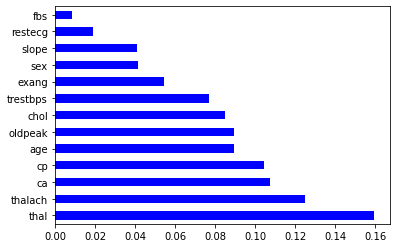

In [93]:
index= data.columns[:-1]
importance = pd.Series(model2.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

In [96]:
print(model2.predict(sc.transform([[20,1,2,110,230,1,1,140,1,2.2,2,0,2]])))
#Outputs Binary 1 -> meaning Positive Diagnosis of Heart Disease

[1]


In [97]:
#First value represents our predicted value, Second value represents our actual value.

#If the values match, then we predicted correctly.
y_pred = model2.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]]
